In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_error

In [94]:
df_OAK = pd.read_csv('OAK_data_cleaned.csv')
df_OAK.head()

,date,w_or_l,runs,runs_allowed,innings,div_rank,gb,time,d_or_n,attendance,...,opponent_TEX,opponent_TOR,opponent_WSN,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,1990-04-09,0,8,3,9.0,0,0.0,2.833333,1,48219,...,0,0,0,0,1,0,0,0,0,0
1,1990-04-10,0,5,3,9.0,1,0.0,2.616667,1,19757,...,0,0,0,0,0,0,0,0,1,0
2,1990-04-11,1,0,3,9.0,1,0.0,2.433333,0,27775,...,0,0,0,0,0,0,0,0,0,1
3,1990-04-19,0,5,2,9.0,1,1.5,2.716667,1,23979,...,0,0,0,0,0,0,0,1,0,0
4,1990-04-20,1,1,6,9.0,1,2.0,2.316667,1,44911,...,0,0,0,1,0,0,0,0,0,0


(array([124., 509., 489., 449., 308., 225., 132., 106.,  25.,  17.]),
 array([ 4651. ,  9816.9, 14982.8, 20148.7, 25314.6, 30480.5, 35646.4,
        40812.3, 45978.2, 51144.1, 56310. ]),
 <a list of 10 Patch objects>)

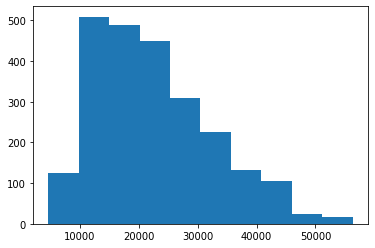

In [95]:
plt.hist([df_OAK["attendance"]])

In [96]:
df_OAK_train = df_OAK[df_OAK.year < 2019]
df_OAK_test = df_OAK[df_OAK.year >= 2019]

In [97]:
columns = list(df_OAK.columns.values)
columns.remove('attendance')
columns.remove('innings')
columns.remove('runs')
columns.remove('runs_allowed')
columns.remove('w_or_l')
columns.remove('date')

In [98]:
X_train = df_OAK_train[columns]
X_test = df_OAK_test[columns]
y_train = df_OAK_train['attendance']
y_test = df_OAK_test['attendance']

In [136]:
def trainModel(model):
  model.fit(X_train, y_train)
  score=model.score(X_test, y_test)
  predictions=model.predict(X_test)
  mae=mean_absolute_error(y_test,predictions)

  return score,mae,np.abs(predictions-y_test).median()

In [100]:
trainModel(LinearRegression())

(0.10559116262482926, 5293.56516415114)

In [101]:
trainModel(DecisionTreeRegressor())

(-0.9127591008182143, 8487.975308641975)

In [102]:
trainModel(XGBRegressor())

[17:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.47463504493354247, 5032.638346354167)

In [103]:
trainModel(RandomForestRegressor())

(0.47706971735636317, 5423.991358024692)

In [104]:
trainModel(XGBRFRegressor())

[17:39:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.2294214452057215, 6242.377628279321)

In [105]:
def plotModel(model):
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  plt.plot(df_OAK['date'][-(y_test.size):], predictions, "--") #predicted
  plt.plot(df_OAK['date'][-(y_test.size):], y_test) #actual
  return np.abs(predictions-y_test).median()

3425.0833812886267

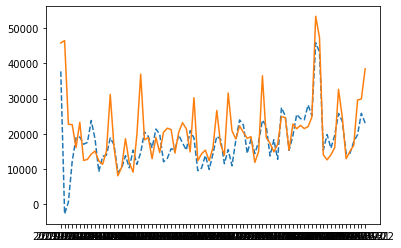

In [106]:
plotModel(LinearRegression())

4534.0

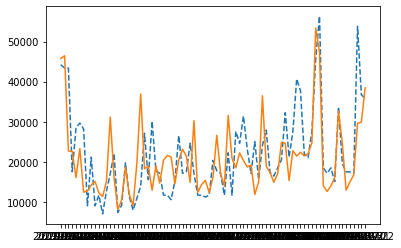

In [107]:
plotModel(DecisionTreeRegressor())

[17:40:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:40:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


4232.78515625

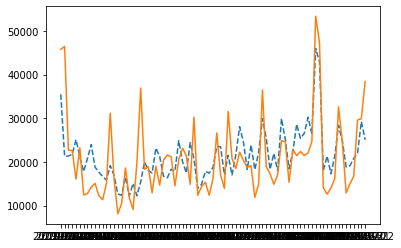

In [112]:
best_model = XGBRegressor()
best_model.fit(X_train, y_train)
plotModel(best_model)

In [115]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [116]:
params={'max_depth': [2, 4, 8, 16, 32, 64],
 'n_estimators': [32, 64, 100, 200]}

model = XGBRegressor()
grid_search=RandomizedSearchCV(model,params,cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)


[17:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [2, 4, 8, 16, 32, 64],
                                        'n_estimators': [32, 64, 100, 200]},
                   scoring='neg_mean_absolute_error')

In [117]:
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 200}

In [118]:
best_model1=grid_search.best_estimator_
predictions1 = best_model1.predict(X_test)
trainModel(best_model1)

[17:45:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.4402944024327081, 4914.125385802469)

[17:45:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


3931.5390625

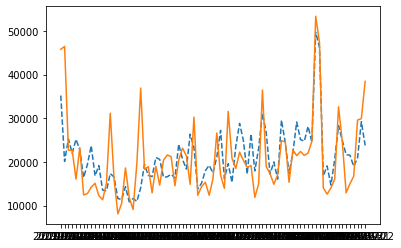

In [119]:
plotModel(best_model1)

In [120]:
from sklearn.model_selection import train_test_split

In [122]:
X_train,X_test,y_train,y_test=train_test_split(df_OAK[columns],df_OAK['attendance'],test_size=0.2)

In [123]:
X_train.shape,X_test.shape

((1907, 58), (477, 58))

In [137]:
trainModel(LinearRegression())

(0.5032428515298444, 5587.720773328623, 4464.680606271839)

In [138]:
trainModel(DecisionTreeRegressor())

(0.33753296003948663, 6110.832285115304, 4141.0)

In [139]:
trainModel(XGBRegressor())

[17:51:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.6603070190044709, 4543.546928229822, 3524.107421875)

In [140]:
trainModel(RandomForestRegressor())

(0.6512342386319351, 4632.693815513628, 3517.7700000000004)

In [141]:
trainModel(XGBRFRegressor())

[17:51:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.31788035756391864, 6802.904530267296, 6081.970703125)

In [142]:
params={'max_depth': [32, 64, 100, 200, None],
 'max_features': ['auto', 'log2', None],
 'min_samples_leaf': [2, 4, 6],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [32, 64, 100, 200]}

model = RandomForestRegressor()
grid_search=RandomizedSearchCV(model,params,cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [32, 64, 100, 200, None],
                                        'max_features': ['auto', 'log2', None],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [32, 64, 100, 200]},
                   scoring='neg_mean_absolute_error')

In [143]:
grid_search.best_params_

{'max_depth': 200,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [144]:
best_model2=grid_search.best_estimator_
predictions2 = best_model1.predict(X_test)
trainModel(best_model2)

(0.6556669342244742, 4552.33053366474, 3347.647809523807)